# Apache Spark Workshop

## Table of content

* [Running pyspark on a local machine](#Running-pyspark-on-a-local-machine)
* [Using Google Colab](#Using-Google-Colab)
  * [Running PySpark on Google CoLab or Jupyter Notebooks](#Running-PySpark-on-Google-CoLab-or-Jupyter-Notebooks)
  * [Baisic RDD operations](#Baisic-RDD-operations)
  * [Working with S3 files](#Working-with-S3-files)
  * [Task 2](#Task-2)
* [Problem definition](#Problem-definition)

## Introduction

The rapid growth of Next Generation Sequencing technologies such as single-cell RNA sequencing(scRNA-seq) demands efficient parallel processing and analysis of big data. Hadoop and Spark are the goto opensource frameworks for storing and processing massive datasets. The most significant advantage of Spark is its iterative analytics capability combined with in-memory computing architecture. Calling .cache() on a resilient distributed dataset (RDD) effectively saves it in memory and makes it instantly available for computation, thus the subsequent filter, map, and reduce tasks become instantaneous. Spark has its query language known as Spark SQL, and its MLlib library is highly desirable for machine learning tasks.

# Running PySpark on a local machine

## Creating virtual environment

There are planty of ways to create python's virtual environment, but the easies is to run `venv` buildin module.

```sh
python3 -m venv venv
```

Once the environment is created you can activate it by running the following command:

```sh
source venv/bin/activate
```

## Installing PySpark

To install pyspark you run command:

```sh
pip install pyspark
```

Then to execute REPL just type `pyspark`

## Configuring pyspark to use ipython as the command shel in the REPL

But default REPL is not that good, and IPython is must better (TBD: expand on this).

```sh
pip install ipython
```

Then to enable ipython interpreter in pyspark repl you will need to setup environment variable `PYSPARK_DRIVER_PYTHON`.

To do so run the following command in the active environment:

```sh
export PYSPARK_DRIVER_PYTHON=ipython
```

In some environments this may not work and the command can tell that

```sh
.../bin/load-spark-env.sh: No such file or directory
```

to fix the issue set `SPARK_HOME` variable:

```sh
export SPARK_HOME=.../venv/lib/python3.7/site-packages/pyspark
```

Now if you run `pyspark` command it will use `ipython` command shell.

And you will have code completion and code highlihting in the Repl.

## Using Jupyter notebook


First of all you need to install Jupyter.

```sh
pip install jupyter
```

Then similar to `ipython` you need to set `PYSPARK_DRIVER_PYTHON` and `PYSPARK_DRIVER_PYTHON_OPTS` variables.

```sh
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS=notebook
```

To ensure that integration with Jupyter notebook works as expected, run the `pyspark` command and in the code cell of the notebook printing `sc` variable. This is default Spark context.

In [ ]:
sc

### Use jupyterlab

There is a jupyterlab project, which will replace notebooks. To use it just install it.

```sh
pip install jupyterlab
```

and set environment variables.

```sh
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS=lab
```

### Spark context


If you run a standalone script you supposed to create spark context yourself. Typically you do it by

```python
from pyspark import SparkConf, SparkContext


conf = SparkConf() \
  .setAppName("appName") \
  .setMaster("local") \
  .set("spark.sample.config", "value")
sc = SparkContext(conf=conf)
```

or

```python
from pyspark import SparkContext

sc = SparkContext(master="local", appName="test_name")
```



Instead of having a spark context, hive context, SQL context, starting from Spark 2.0 all of it is encapsulated in a Spark session. You can create spark session yourself:

In [ ]:
from pyspark.sql import SparkSession

sc2 = SparkSession.builder \
  .master("local[*]") \
  .appName("name of the script") \
  .config("spark.some.config.option", "some-value") \
  .getOrCreate()
sc2

Also you can craete a new SparkSession from existing SparkContext by passing it into the initializer.

In [ ]:
sc3 = SparkSession(sc)
sc3

Note that, we don't have to create a spark session object when using spark-shell. It is already created for us with the variable `spark`.

In [ ]:
spark

Please see https://spark.apache.org/docs/2.4.4/api/python/pyspark.sql.html?highlight=sparksession for interface of the builder.

As you can see in the example we have set `spark.some.config.option` setting to `some-value`. There lots of such properties which that can control important aspects of Spark.
Consider for example `spark.submit.pyFiles` or `spark.jars` properties. 

You can find complete list of all avaiable settings here https://spark.apache.org/docs/2.4.4/configuration.html

# Using Google Colab

Though it is not that difficult to setup development environment on you local computer, installing it on the google colab even easier.

But before you can install pyspark on the colab you will need to install dependencies.

Typically you install dependencies by running `pip install` command, like so:

```sh
# !apt-get --quiet install -y openjdk-8-jdk-headless
# !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!pip install pyspark
```

Nowadays it is enough to just install `pyspark` because `java` is already installed.

But in this tutorial we going to use Apache Spark 3.0.0-preview2, which is not yet available on PyPI. That is why we will install the package ourself.

Inside the very first cell of the colab notebook run:

```sh
!wget https://www-us.apache.org/dist/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop3.2.tgz
!tar -xzf spark-3.0.0-preview2-bin-hadoop3.2.tgz
!cd spark-3.0.0-preview2-bin-hadoop3.2/python && python ./setup.py install
```

Once those command finished, you will need to restart the notebook's runtime, so the runtime can find pyspark module.

![runtime_restart.png](runtime_restart.png)


**NOTE:** you can use the same procedure to install PySpark 3.0.0-preview2 on your local computer.

## Running PySpark on Google CoLab or Jupyter Notebooks

Once dependencies installed we will need to create Spark Context. We can create it from the Spark Configuration object, but for now we will use constructor of the SparkContext object.

The very first thing you has to do to properly configure PySpark in Google Colab (or Jupyter Notebook) is to set up mandatory environment variables.

In [1]:
import os
import pyspark
import findspark

findspark.init(os.path.dirname(pyspark.__file__))

If for some reason you do not want to relay on `findspark` library, you can set environment variables yourself:

``` python
import os

os.environ["SPARK_HOME"] = os.path.join(os.getcwd(), "venv/lib/python3.7/site-packages/pyspark")
os.environ['PYSPARK_SUBMIT_ARGS'] = "--packages=org.apache.hadoop:hadoop-aws:2.7.3 pyspark-shell"
os.environ
```

Another important thing is configuring the Spark Context.

Because you directly import PySpark in your notebook, you have to manualy specify all neccessary settings using `set` method of the `SparkConf` object.


```python
.set("spark.executor.memory", "4G")
.set("spark.driver.memory", "16G")
.set("spark.driver.maxResultSize", '8G')
.set("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.2.0")
```

**Please note** that you cannot use hadoop version other than installed with your pyspark distribution.
You can file hadoop version by running following command:
```bash
find venv/lib/python3.7/site-packages/pyspark -iname "*hadoop*.jar"
```

Anyhow, the next thing is to create Spark configuration and/or the context/session.

In [2]:
from pyspark import SparkConf, SparkContext

conf = SparkConf() \
  .set("spark.jars.packages", "org.apache.hadoop:hadoop-aws:3.2.0") \
  .set("spark.executor.extraJavaOptions", "-Dcom.amazonaws.services.s3.enableV4=true") \
  .set("spark.driver.extraJavaOptions", "-Dcom.amazonaws.services.s3.enableV4=true")

sc = SparkContext(master="local[*]", appName="example", conf=conf)

When you run these lines for the first type, Apache Spark will download missing java packages and upload them into machine local cache (`~/.ivi2/` directory for macOS).

In [3]:
hadoop_conf = sc._jsc.hadoopConfiguration()
hadoop_conf.set("fs.s3a.aws.credentials.provider", "org.apache.hadoop.fs.s3a.AnonymousAWSCredentialsProvider")

The setting `AnonymousAWSCredentialsProvider` will not work for PySpark 2.4.5. Thus you will have to set AWS credentials either in the `conf/spark-defaults.conf` file or by running following code:

``` python
hadoop_conf = sc._jsc.hadoopConfiguration()
hadoop_conf.set("fs.s3a.awsAccessKeyId", "XXXXX")
hadoop_conf.set("fs.s3a.awsSecretAccessKey", "XXXXX")
hadoop_conf.set("fs.s3a.endpoint", "s3-ap-south-1.amazonaws.com")
```

## Baisic RDD operations

RDD is the main low-level abstraction in Spark. All higher-level APIs are based on RDD. In order to create an RDD you need a SparkContext (provided as sc in spark-shell):

In [4]:
rdd = sc.parallelize([1, 2, 3, 4, 5])

Note, that RDD has an API pretty similar to Scala collections:

In [5]:
rdd.map(lambda x: x * 10).foreach(print)

**NOTE:** If you running the code above in the Google Colab or Jupyter Notebook you will not see any output.
But you can collect the data to a python variable any print it manually.

In [6]:
for i in rdd.map(lambda x: x * 10).collect(): print(i)

10
20
30
40
50


Or you can came up with a fancier approach.

In [7]:
from functools import partial
from operator import mul
from collections import deque


deque(map(print, rdd.map(partial(mul, 10)).collect()), maxlen=0)

10
20
30
40
50


deque([])

As you can see not only Python generators are lazy but RDD themself are lazy too.

In [8]:
def print_map(x):
    print(f"mapping {x}")
    return x + 10


l = [1, 2, 3, 4, 5]

map(print_map, l)
for i in map(print_map, l): print(i)

mapping 1
11
mapping 2
12
mapping 3
13
mapping 4
14
mapping 5
15


In [9]:
rdd.map(print_map)
for i in rdd.map(print_map).collect(): print(i)

11
12
13
14
15


Also you might notice that for RDD map outputs are mixed with foreach outputs. That's because computations on RDD are performed in parallel. We can tune the level of parallelism:

In [10]:
a = sc.parallelize(range(0, 1000000), 1).sum()
b = sc.parallelize(range(0, 1000000), 4).sum()

(a, b)

(499999500000, 499999500000)

Unlike List, RDD is distributed, it doesn't have to fit into the RAM on a signle machine.

## Working with S3 files

Let's try to load some real dataset!

We will be using public dataset on Amazon S3. You can find its description here: https://amplab.cs.berkeley.edu/benchmark/. In order to get access to the dataset we need to tune the configuration:

In [11]:
uv = sc.textFile("s3a://big-data-benchmark/pavlo/text/tiny/uservisits")

Check the number of records in the dataset:

In [12]:
uv.count()

10000

Print first 10 elements:

In [13]:
for i in uv.take(10): print(i)

182.163.112.4,nbizrgdziebsaecsecujfjcqtvnpcnxxwiopmddorcxnlijdizgoi,1978-10-17,0.332717,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.2),BGR,BGR-BG,seismoscopic,10
146.97.78.95,nbizrgdziebsaecsecujfjcqtvnpcnxxwiopmddorcxnlijdizgoi,1993-06-15,0.9109504,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.2),PRT,PRT-PT,hallmarks,3
227.209.164.46,nbizrgdziebsaecsecujfjcqtvnpcnxxwiopmddorcxnlijdizgoi,1991-06-10,0.115967035,Mozilla/5.0 (iPhone; U; CPU like Mac OS X)AppleWebKit/420.1 (KHTML like Gecko) Version/3.0 Mobile/4A93Safari/419.3,YEM,YEM-AR,tetanolysin,1
35.143.225.164,nbizrgdziebsaecsecujfjcqtvnpcnxxwiopmddorcxnlijdizgoi,1996-05-31,0.8792629,Mozilla/5.0 (Windows; U; Windows NT 5.2) AppleWebKit/525.13 (KHTML like Gecko) Chrome/0.2.149.27 Safari/525.13,PRT,PRT-PT,macrolecithal,8
34.57.45.175,nbizrgdziebsaecsecujfjcqtvnpcnxxwiopmddorcxnlijdizgoi,2001-06-29,0.14202267,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1),DOM,DOM-ES,Assidaean,7
224.98.214.109,nbizrgdziebsaecsecujfjcqtvnpcnxxwi

Looks like this dataset is in CSV format. Let's try to extract some data from it:

In [14]:
def destruct_row(row):
    (ip, url, date, revenue, ua, country, lang, search, duration) = row
    return (ip, date, ua, country, lang)


parsed_uv = uv.map(lambda line: line.split(",")).map(destruct_row)

for record in parsed_uv.take(10):
    print(record)

('182.163.112.4', '1978-10-17', 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.2)', 'BGR', 'BGR-BG')
('146.97.78.95', '1993-06-15', 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.2)', 'PRT', 'PRT-PT')
('227.209.164.46', '1991-06-10', 'Mozilla/5.0 (iPhone; U; CPU like Mac OS X)AppleWebKit/420.1 (KHTML like Gecko) Version/3.0 Mobile/4A93Safari/419.3', 'YEM', 'YEM-AR')
('35.143.225.164', '1996-05-31', 'Mozilla/5.0 (Windows; U; Windows NT 5.2) AppleWebKit/525.13 (KHTML like Gecko) Chrome/0.2.149.27 Safari/525.13', 'PRT', 'PRT-PT')
('34.57.45.175', '2001-06-29', 'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1)', 'DOM', 'DOM-ES')
('224.98.214.109', '1981-08-08', 'Opera/8.0 (Macintosh; PPC Mac OS X; U; en)', 'LTU', 'LTU-LT')
('145.79.170.187', '1992-11-16', 'Mozilla/4.0 (compatible; MSIE 5.5; Windows 98; Win 9x 4.90)', 'SLV', 'SLV-ES')
('58.66.122.55', '2010-03-17', 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.2)', 'ROU', 'ROU-RO')
('50.210.132.5', '1975-01-27', 'Mozilla/4.0 (compa

Let's see who still uses Win95 after 2000:

In [15]:
def is_old_school(ip, date, ua, country, lang):
    return (int(date[:4]) > 2000) and ("Win95" in ua)


win95_visits = parsed_uv.filter(lambda x: is_old_school(*x))

win95_visits.collect()

[('213.114.82.239',
  '2007-03-09',
  'Netscape 2.02 (Win 95): Mozilla/2.02E (Win95; U)',
  'IND',
  'IND-EN'),
 ('90.110.70.173',
  '2011-06-12',
  'Netscape 2.02 (Win 95): Mozilla/2.02E (Win95; U)',
  'CHE',
  'CHE-DE'),
 ('228.194.1.39',
  '2006-07-14',
  'Netscape 3.01 gold (Win 95): Mozilla/3.01Gold (Win95; I)',
  'VNM',
  'VNM-VI'),
 ('136.234.133.36',
  '2003-05-22',
  'Netscape 2.02 (Win 95): Mozilla/2.02E (Win95; U)',
  'JPN',
  'JPN-JA'),
 ('156.49.254.148',
  '2002-06-21',
  'Netscape 3.01 gold (Win 95): Mozilla/3.01Gold (Win95; I)',
  'DEU',
  'DEU-DE'),
 ('129.222.247.197',
  '2004-08-14',
  'Netscape 2.02 (Win 95): Mozilla/2.02E (Win95; U)',
  'KWT',
  'KWT-AR'),
 ('42.122.87.14',
  '2005-05-25',
  'Netscape 2.02 (Win 95): Mozilla/2.02E (Win95; U)',
  'MKD',
  'MKD-MK'),
 ('126.6.19.194',
  '2008-07-05',
  'Netscape 2.02 (Win 95): Mozilla/2.02E (Win95; U)',
  'CHE',
  'CHE-FR')]

Let's see in what countries English is the most popular language:

In [16]:
from operator import add


def is_english(x):
  (ip, date, ua, country, lang) = x
  return lang.endswith("-EN")


def eng_count(x):
  (ip, date, ua, country, lang) = x
  return (country, 1)


en_visits = parsed_uv.filter(is_english).map(eng_count).reduceByKey(add).sortBy(lambda x: x[1], ascending = False)
en_visits.take(10)

[('USA', 99),
 ('CAN', 97),
 ('ZAF', 97),
 ('AUS', 97),
 ('NZL', 97),
 ('IRL', 91),
 ('MLT', 91),
 ('GBR', 88),
 ('IND', 88),
 ('PHL', 82)]

Note, that in these examples we've been re-using `parsed_uv` several times. By default RDD is re-calculated from scratch on any action. This can be changed by calling `cache()` or `persist()`:

In [17]:
parsed_uv.count()

10000

In [18]:
parsed_uv.count() # re-calculates each time

10000

In [19]:
parsed_uv.cache()

PythonRDD[30] at RDD at PythonRDD.scala:53

In [20]:
parsed_uv.count()
parsed_uv.count() # takes RDD's data from cache

10000

Be careful with caching: RDD's data must fit into the storage selected for caching (memory or disk).

## Task 2

Using the same UserVisits dataset, calculate top 3 countries by revenue for each year. The output should be in the the following format:

```
1970 JPN=4.09070528, CHN=3.63227436, NOR=3.622796814
1971 USA=5.374340921, PAN=3.37988379, HKG=3.10137702
...
```

# Problem definition

## Quick recap


### DNA and RNA

![dna_rna.png](dna_rna.png)

### Eukariot Gene Structure

A gene structure of a typical eukariot is depitec on the image bellow.
The signature difference of eukariot from prokariotic gene is that a gene have got exon-intron structure and there is an alternative spilecing.

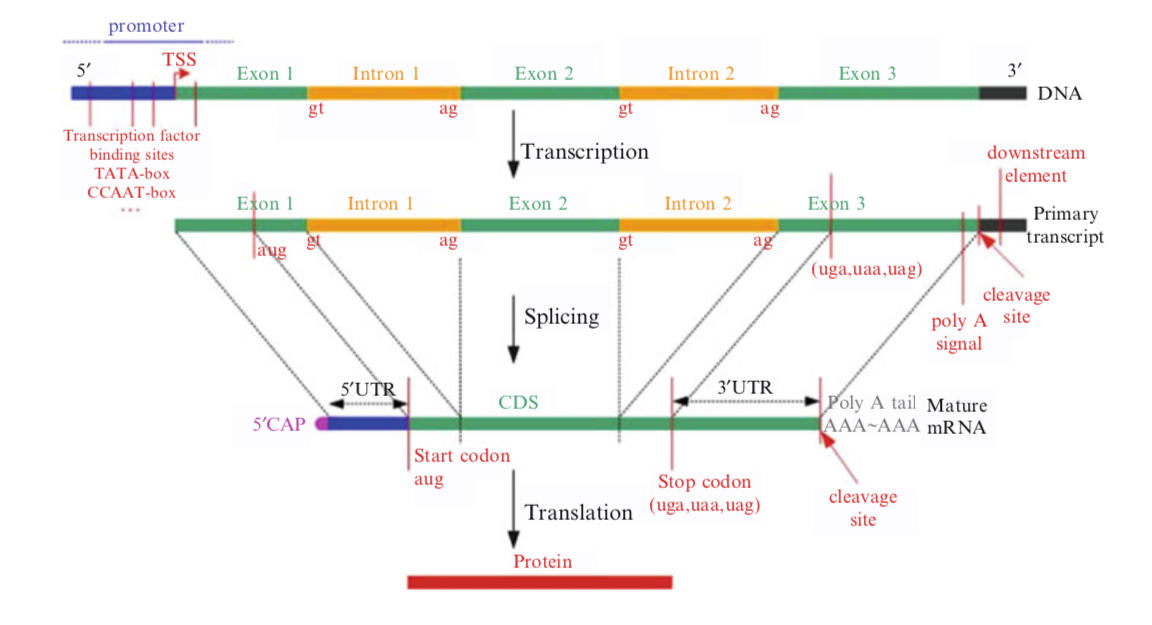

## Computing Reads mean GC-content.

### What is GC-content

The GC-content of a DNA is given by the percentage of symbols in the string that are "C" or "G". For example, the GC-content of "AGCTATAG" is 0.375. In other words, the formula to compute GC-content is $\frac{Count(G+C)}{Count(A+T+G+C)}$.

Reads' GC-content should follow a normal distribution and center on the GC-content of the organism. An unusually shaped distribution or a large shift from the source genome's GC-content can indicate library contamination.


![fastqc_1.png](fastqc_1.png)
![fastqc_2.png](fastqc_2.png)

FastQC also plots GC-content per base position, which should produce a flat line at the level of the source genome's GC-content. Different GC-content at certain base positions indicates a presence of overrepresented sequence in the library.

![fastqc_3.png](fastqc_3.png)

###  Fastq file format

In this exercise, we will read a gzipped fastq files. The fastq is a text-based format that usually stores a nucleotide sequence obtained from sequencing biological samples and the corresponding quality information. Actually, these sequences can be obtained not only from RNA-seq, ChiP-seq, DNase-seq, ATAC-seq, their single-cell variants, and others but also can contain peptide sequences. Though, in this exercise we do not need to know what kind of an experiment produced the source files.
Typically a sequencer machine "reads" the biological sample in small chunks called "reads" and then writes them into a fastq file. And every single read consumes four lines in a file (for more information please see [FASTQ format specification](http://dx.doi.org/10.1093/nar/gkp1137)):

```
@identifier, and optional meta information of the sequence
The actual sequence
+ and optional meta information
Quality line in phred64 format
```

We are interested in the second and fourth lines. That means that you will have to find a way how to read a text file, then split it into groups by four lines and then finally transform the second and the fourth lines of each group into a single RDD record.

-----

### Phred encoding

TBD: description

Once he RDD is formed, please compute:

GC content of each read;
GC content of a read filtering out ends of reads if their quality is too low;
GC content of the entire sequence excluding those reads which contains low-quality nucleotides;
(вопрос)Nucleotide distribution per position. (every read position we expect that A, T, G, and C are normally distributed; i.e. like a graph in FastQC).

## Download FASTQ file

```sh
!mkdir /content
!mkdir /content/data
!cd /content

!wget 'https://ftp-trace.ncbi.nlm.nih.gov/sra/sdk/2.9.6-1/sratoolkit.2.9.6-1-ubuntu64.tar.gz'
!gunzip sratoolkit.2.9.6-1-ubuntu64.tar.gz
!tar -xf sratoolkit.2.9.6-1-ubuntu64.tar

!wget https://sra-download.ncbi.nlm.nih.gov/traces/era6/ERR/ERR3014/ERR3014700
!/content/sratoolkit.2.9.6-1-ubuntu64/bin/fastq-dump /content/ERR3014700 -O /content/data
```

Zika virus URL: ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/
genomes/Homo_sapiens/UCSC/hg19

The first publicly available study profiling gene expression changes after ZIKV infection of human cells was deposited into NCBI's Gene Expression Omnibus (GEO) in March 2016. The raw data is available (ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP/SRP070/SRP070895/) from the Sequence Read Archive (SRA) with accession number **GSE78711**.


The total number of **samples is eight**, with four untreated samples and four infected samples. 